In [149]:
import pandas as pd
import lightkurve as lk
from lightkurve import search_lightcurve
import matplotlib.pyplot as plt
import numpy as np

In [150]:
def mask_lc(KIC, mask_folder='', download_dir=None):
    """
    Gets lightcurve, masks transits, and returns times and fluxes.
    """
    KICID = f'KIC {KIC}'
    mask_file = f'{mask_folder}KIC_{KIC}_rmask.npy'
    mask = np.load(mask_file)
    
    lc = search_lightcurve(KICID, cadence="long").download(download_dir=download_dir)
    
    time = lc.time.value
    flux = lc.flux.value

    return time[mask], flux[mask]

def mask_tr(KIC, mask_folder='', download_dir=None):
    """
    Gets lightcurve, masks everything except transits, and returns times and fluxes
    """
    KICID = f'KIC {KIC}'
    mask_file = f'{mask_folder}KIC_{KIC}_tmask.npy'
    mask = np.load(mask_file)
    
    lc = search_lightcurve(KICID, cadence="long").download(download_dir=download_dir)
    
    time = lc.time.value
    flux = lc.flux.value

    return time[mask], flux[mask]

def get_masked_lightcurve(time, flux):
    """
    Turns time and flux values back into a lightcurve object
    """
    return lk.LightCurve(time=time, flux=flux)

C:\Users\Peter\anaconda3\lib\site-packages\lightkurve\search.py:346: LightkurveWarning: Warning: 17 files available to download. Only the first file has been downloaded. Please use `download_all()` or specify additional criteria (e.g. quarter, campaign, or sector) to limit your search.
  warnings.warn(


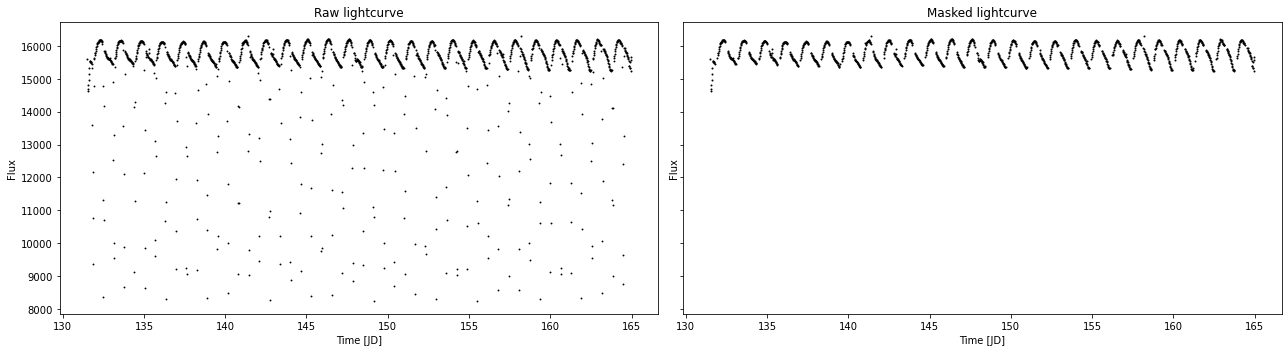

In [159]:
KIC = 5300878
mask_folder = './masks/'
download_dir = 'data'

time, flux = mask_lc(KIC, mask_folder, download_dir)
masked_time, masked_flux = mask_tr(KIC, mask_folder, download_dir)

lc = get_masked_lightcurve(time, flux)

fig, ax = plt.subplots(1,2, figsize=(18,5), sharey=True)
lc.scatter(c='k', ax=ax[0])
lc.scatter(c='k', ax=ax[1])
ax[0].scatter(masked_time, masked_flux, s=0.75, color='k')
ax[0].set_title('Raw lightcurve')
ax[1].set_title('Masked lightcurve')
plt.tight_layout();